# My First Neural Network, Part 1

> Where we expand previous lessons to larger systems
- toc: true
- branch: master
- badges: true
- comments: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2
- image: https://i.imgur.com/7Oj5Ksn.png
- description: First in a series on understanding neural network models.

Links to lessons:
[Part 0](https://drscotthawley.github.io/Following-Gravity/),
[Part 1](https://colab.research.google.com/drive/1CPueDKDYOC33U_0qHxBhsDPpzYMpD8c8), 
[Part 2](https://colab.research.google.com/drive/1O9xcdAQUxo7KdVhbggqLCvabc77Rj-yH)
[Part 3](https://colab.research.google.com/drive/1UZDEK-3v-SWxpDYBfamBoD4xhy7H2DEZ#scrollTo=14tOCcvT_a0I)

We will be reproducing work from Andrew Trask's excellent tutorial ["A Neural Network in 11 lines of Python"](https://iamtrask.github.io/2015/07/12/basic-python-network/), albeit with a different emphasis, and in a different way.  You may regard this treatment and his original treatment as complimentary, and feel free to refer to both.  This lesson is written with the intent of building on the lesson about linear regression -- which we might call "Part 0" -- at the link ["Following Gravity - ML Foundations Part Ia."](https://drscotthawley.github.io/Following-Gravity/) 

## The Sample Problem

Consider a system that tries to map groups of 3 inputs to some corresponding output which is a single number. In the following picture, we'll show each set of 3 inputs as a row of a matrix $X$, and each output as the corresponding row of $Y$:

$$ \overbrace{
 \left[ {\begin{array}{ccc}
   0 & 0 & 1 \\
   0 & 1 & 1\\
   1 & 0 & 1\\
   1 & 1 & 1\\
  \end{array} } \right]
}^{X} \rightarrow
\overbrace{
 \left[ {\begin{array}{c}
   0   \\
   0  \\
   1  \\
   1 \\
  \end{array} } \right]
  }^Y.
$$

Even though this system has an exact solution (namely, $Y$ equals the first column of $X$), usually we'll need to be satisfied with a system that maps our inputs $X$ to some approximate "prediction" $\tilde{Y}$, which we hope to bring closer to the "target" $Y$ by means of successive improvements. 

The way we'll get our prediction $\tilde{Y}$ is by means of a weighted sum of each set of 3 inputs, and some nonlinear function $f$ which we call the "[activation function](https://en.wikipedia.org/wiki/Activation_function)" (or just "activation").   Pictorially, the process looks like the following, for each row $i$ of $X$ and $Y$, (where the columns of $X$ are shown arranged vertically instead of horizonally):


![image of NN](https://i.imgur.com/7Oj5Ksn.png)

In terms of matrix multiplication, since X is a 4x3 matrix, and Y is a 4x1 matrix, that implies that our weights should be a 3x1 matrix consisting of (unknown) values $w_0$, $w_1$ and $w_2$. The calculation can be written as:

$$
f\left(
  \overbrace{
 \left[ {\begin{array}{ccc}
   0 & 0 & 1 \\
   0 & 1 & 1\\
   1 & 0 & 1\\
   1 & 1 & 1\\
  \end{array} } \right]
}^\text{X} 
\overbrace{
   \left[ {\begin{array}{c}
   w_0  \\
    w_1\\
   w_2\\
  \end{array} } \right]
 }^{w}
\right)
  = 
  \overbrace{
 \left[ {\begin{array}{c}
   0   \\
   0  \\
   1  \\
   1 \\
  \end{array} } \right]
 }^{\tilde{Y}}
$$


Our nonlinear activation function $f$ is taken to operate on each row element one at a time, and we'll let $f_i$ denote the $i$th row of this completed activation, i.e.:

$$
f_i = f\left( \sum_j X_{ij}w_j \right) = \tilde{Y}_i .
$$


The particular activation function we will use is the "sigmoid",

$$
f(x) = {1\over{1+e^{-x}}}, 
$$
-- [click here to see a plot of this function](https://www.google.com/search?q=plot+1%2F(1%2Bexp(-x) -- which has the derivative 

$$
{df\over dx} = {e^{-x}\over(1 + e^{-x})^2}
$$
which can be shown (*Hint: exercise for "mathy" students!*) to simplify to
$$
 {df\over dx}= f(1-f).
$$

The overall problem then amounts to finding the values of the "weights" $w_0, w_1,$ and $w_2$ so that the $\tilde{Y}$ we calculate is as close to the target $Y$ as possible.

To do this, we will seek to minimize a loss function defined as a sum across all data points we have, i.e. all 4 rows. The loss function $L$ we will choose is the mean square error loss, or MSE (note: later in [Part 2](https://colab.research.google.com/drive/1O9xcdAQUxo7KdVhbggqLCvabc77Rj-yH#scrollTo=AFGL_ThJKJfM) we will use a 'better' loss function for this problem):

$$
L = {1\over N}\sum_{i=0}^{N-1} \left[ \tilde{Y}_i - Y_i\right]^2,
$$
or in terms of the activation function
$$
L = {1\over N}\sum_{i=0}^{N-1} \left[ f_i - Y_i\right]^2.
$$

Each of the weights $w_j$ ($j=0..2$) will start with random values, and then be updated via gradient descent, i.e. 

$$
w_j^{new} = w_j^{old} - \alpha{\partial L\over \partial w_j}
$$

where $\alpha$ is the *learning rate*, chosen to be some small parameter.
For the MSE loss shown above,  the partial derivatives with respect to each of the weights is

$$
{\partial L\over \partial w_j} = {2\over N}\sum_{i=0}^{N-1} \left[ \tilde{Y}_i - Y_i\right]{\partial f_i \over \partial w_j}\\
= {2\over N}\sum_{i=0}^{N-1} \left[ \tilde{Y}_i - Y_i\right]f_i(1-f_i)X_{ij}.
$$

Absorbing the factor of 2/N into our choice of $\alpha$, and writing the summation as a dot product, and noting that $f_i = \tilde{Y}_i$, we can write the update for all the weights together as 

$$
w = w - \alpha  X^T \cdot \left( [\tilde{Y}-Y]*\tilde{Y}*(1-\tilde{Y})\right)
$$
where the $\cdot$ denotes a matrix-matrix product (i.e. a dot product for successive rows of $X^T$) and $*$ denotes elementwise multiplication.  

To clarify the above expression in terms of matrix dimensions, we can see that $w$, a 3x1 matrix, can be made by multipyting $X^T$ (a 3 x4 matrix) with the term in parentheses, i.e. the product of elementwise terms involving $\tilde{Y}$, which is a 4x1 matrix.  In other words, a 3x4 matrix, times a 4x1 matrix, yields a 3x1 matrix. 

## Actual Code
The full code for all of this is then...

In [0]:
# Source: Slightly modified from Andrew Trask's code posted at 
#         https://iamtrask.github.io/2015/07/12/basic-python-network/
import numpy as np

# sigmoid activation
def sigmoid(x,deriv=False): 
  if(deriv==True):
    return x*(1-x)
  return 1/(1+np.exp(-x))
    
# input dataset
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])
    
# target output dataset            
Y = np.array([[0,0,1,1]]).T

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)

# initialize weights randomly with mean 0
w = 2*np.random.random((3,1)) - 1

alpha = 1.0   # learning rate

loss_history = []    # keep a record of how the loss proceeded, blank for now
for iter in range(1000):

    # forward propagation
    Y_pred = sigmoid(np.dot(X,w)) # prediction, i.e. tilde{Y}

    # how much did we miss?
    diff = Y_pred - Y
    loss_history.append((diff**2).mean())   # add to the history of the loss

    # update weights
    w -= alpha * np.dot( X.T, diff*sigmoid(Y_pred, deriv=True))

print("Output After Training:")
print("Y_pred = (should be two 0's followed by two 1's)\n",Y_pred)
print("weights =\n",w)

Output After Training:
Y_pred = (should be two 0's followed by two 1's)
 [[0.03178421]
 [0.02576499]
 [0.97906682]
 [0.97414645]]
weights =
 [[ 7.26283009]
 [-0.21614618]
 [-3.41703015]]


Note that, because of our nonlinear activation, we *don't* get the solution $w_0=1, w_1=0, w_2=0$.

Plotting the loss vs. iteration number, we see...

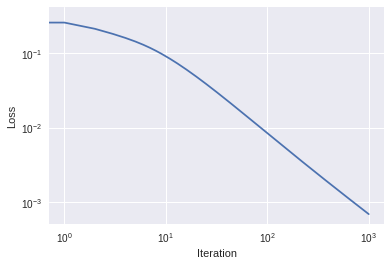

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.loglog(loss_history)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

## Change the activation function

Another popular choice of activation function is the *rectified linear unit* or ReLU.  The function ReLU(x) is zero for x <= 0, and equal to x (i.e. a straight line at 45 degrees for)  x >0.  It can be written as max(x,0) or  x * (x>0), and its derivative is 1 for positive x, and zero otherwise. 

[Click here to see a graph of ReLU](https://www.desmos.com/calculator/vjqfxlgmzl)

Modifying our earlier code to use ReLU activation instead of sigmoid looks like this:

In [0]:
def relu(x,deriv=False):   # relu activation
  if(deriv==True):
    return 1*(x>0) 
  return x*(x>0)

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)

# initialize weights randomly  (but only >0 because ReLU clips otherwise)
w = np.random.random((3,1))

alpha = 0.3   # learning rate

new_loss_history = []    # keep a record of how the error proceeded
for iter in range(1000):

    # forward propagation
    Y_pred = relu(np.dot(X,w))

    # how much did we miss?
    diff = Y_pred - Y
    new_loss_history.append((diff**2).mean())   # add to the record of the loss

    # update weights
    w -= alpha * np.dot( X.T, diff*relu(Y_pred, deriv=True))

print("Output After Training:")
print("Y_pred = (should be two 0's followed by two 1's)\n",Y_pred)
print("weights =\n",w)

Output After Training:
Y_pred = (should be two 0's followed by two 1's)
 [[-0.]
 [-0.]
 [ 1.]
 [ 1.]]
weights =
 [[ 1.01784368e+00]
 [ 8.53961786e-17]
 [-1.78436793e-02]]


In [0]:
# Aside/Trivia (you can skip this cell): I find it interesting that apparently w2 = 1-w0
print( w[2] - (1-w[0]) )

[-3.46944695e-17]


Plot old results with new results:

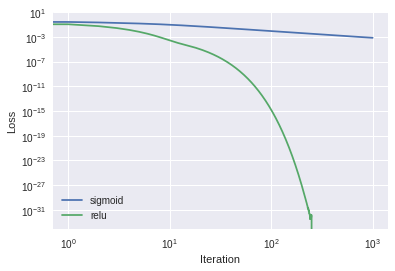

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.loglog(loss_history,label="sigmoid")
plt.loglog(new_loss_history,label="relu")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.show()

Looks like ReLU may be a better choice than sigmoid for this problem!

## Exercise: Read a 7-segment display

A [7-segment display](https://en.wikipedia.org/wiki/Seven-segment_display) is used for displaying numerical digits 0 through 9, usually by lighting up LEDs or parts of a liquid crystal display (LCD).  The segments are labelled $a$ through $g$ according to the following diagram:

![7-segment diagram](https://i.imgur.com/ZyHGDKy.png =100x150) 

### Diagram of the network
The 7 inputs "a" through "g" will be mapped to 10 outputs for the individual digits, and each output can range from 0 ("false" or "no") to 1 ("true" or "yes") for that digit.  The input and outputs will be connected by a matrix of weights.  Pictorially, this looks like the following (Not shown: activation function $f$):

![diagram of 7-seg network](https://i.imgur.com/mERzmFE.png)

...where again, this network operates on a single data point at a time, datapoints which are *rows* of *X* and *Y*.  What is shown in the above diagram are the *columns* of $X$ and $Y$ for a single row (/ single data point).

### Create the dataset
Let the input X be the segments $a$ through $g$ are the columns of the input $X$, and are either 1 for on or 0 for off.  Let the columns of the target $Y$ be the digits 0-9 themselves arranged in a ["one hot" encoding](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/) scheme, as follows:


<table>
  <tr><td>Digit</td><td>One-Hot Encoding for $Y$</td></tr>
    <tr><td>0</td><td>1,0,0,0,0,0,0,0,0,0</td></tr>
    <tr><td>1</td><td>0,1,0,0,0,0,0,0,0,0</td></tr>
    <tr><td>2</td><td>0,0,1,0,0,0,0,0,0,0</td></tr>
  <tr><td>...</td><td>...</td></tr>
    <tr><td>9</td><td>0,0,0,0,0,0,0,0,0,1</td></tr>
  </table>
  The values in the columns for $Y$ are essentially true/false "bits" for each digit, answering the question "Is this digit the appropriate output?" with a "yes"(=1) or "no" (=0) response. 

The input $X$ will be a 10x7 matrix, and the target $Y$ will be a 10x10 matrix. Each row of $X$ will be the segments to produce the digit for that row.  For example, the zeroth row of $X$ should show segments on which make an image of the digit zero, namely segments a, b, c, d, e, and f but not g, so that the zeroth row of X should be [1,1,1,1,1,1,0].

Define numpy arrays for both $X$ and $Y$  (Hint: for $Y$, check out [np.eye()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.eye.html)): 



In [0]:
# Students: fill these out completely for what the X and Y *should* be
# for the 7-segment display.  The following is just a "stub" to get you started.
X = np.array([ [1,1,1,1,1,1,0],
               [],
               [],
               [] ])
Y = np.array([ [1,0,0,0,0,0,0,0,0,0],
               [],
               [] ])

### Initialize the weights
Previously the dimensions of the weight matrix $w$ were 3x1 because we were mapping each row of 3 elements in $X$ to each row of 1 element of $Y$.  For this new problem,
each row of $X$ has 7 elements, and we want to map those to the 10 elements in each 1-hot-encoded row of $Y$, so what should the dimensions of the weights matrix $w$ be? 

Write some numpy code to randomly initialize the weights matrix:

In [0]:
np.random.seed(1)  # initial RNG so everybody gets similar results

w = np.random.random(( , ))    # Students, fill in the array dimensions here

SyntaxError: ignored


### Train the network
Having created an $X$ and its matching $Y$, and initalized the weights $w$ randomly, train a neural network such as the ones above to learn to map a row of X to a row of Y, i.e. train it to recognize digits on 7-segment displays.  Do this below.

In [0]:
# Students, copy training code from above and paste it here. 
#  Use sigmoid activation, and 1000 iterations, and learning rate of 0.9
#    Question: What happens if you use ReLU instead? Try it later. Is ReLU always the best choice?


# And then print out your Y_pred & weights matrix, and limit it to 3 significant digits
print("Output After Training:")
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)}) # 3 sig figs
print("Y_pred=\n",Y_pred)
print("weights =\n",repr(w))  # the repr() makes it so it can be copied & pasted back into Python code

## Final Check: Keras version

[Keras](https://keras.io/) is a neural network library that lets us write NN applications very compactly.  Try running the following using the X and Y from your 7-segment dataset:

In [0]:
# Just a demo of how one might similarly train a network using Keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
model = Sequential([
    Dense(10, input_shape=(7,)),
    Activation('sigmoid') ])
model.compile(optimizer='adam',   # We'll talk about optimizer choices and loss choices later
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X, Y, epochs=200, batch_size=1)
print("\nY_tilde = \n", model.predict(X) )

# Follow-up: Remarks

### Re-stating what we just did
The original problem (posed at the top of this notebook) involves mapping some points from a 3-dimensional space into points in a 1-dimensional space, i.e. to points on the number line.  The mapping is done by the combination of a weighted sum (a linear operation) and a nonlinear "[activation function](https://en.wikipedia.org/wiki/Activation_function)" applied to that sum. The use of an activation function like a sigmoid was originally intended to serve as an analogy of activation of biological neurons.   Nonlinear activation functions are source of the "power" of neural networks  (essentially we approximate some other function by means of a sum of *basis functions* in some [function space](https://en.wikipedia.org/wiki/Function_space), but don't worry about that if you're not math-inclined).   The algorithm 'learns' to approximate this operation via supervised learning and gradient descent according to some loss function.  We used the mean squared error (MSE) for our loss, but [lots](https://towardsdatascience.com/common-loss-functions-in-machine-learning-46af0ffc4d23) and [lots](https://heartbeat.fritz.ai/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0) of different loss functions could be used, a few of which we'll look at another time. 

**Question for reflection:** Unlike fitting a line $y = mx+b$, the weighted sum in our models in this notebook had no constant "bias" term like $b$. How might we include such a term?

### One thing we glossed over: "[batch size](https://www.youtube.com/watch?v=vVX9vld3vrY)"
Question: Should we apply the gradient descent "update" to the weights *each time* we process a single row of $X$ & $Y$, or should we compute the combined loss of all the rows together at the same time, and *then* do the update?   This is essentially asking the same question as "When fitting a line $mx+b$ to a bunch of data points, should we use all the points together to update $m$ and $b,$ or should we do this one point at a time -- compute the gradients of the loss at one point, update the weights, compute gradients at another point, etc.?" 

 The number of points you use is called the *batch size* and it is what's known as a "hyperparameter" -- it is not part of the model *per se*, but it is a(n important) choice *you* make when training the model.  The batch size affects the learning as follows:   Averaging the gradints for  many data points (i..e. a large batch size) will produce a smoother loss function and will also usually make the code execute more quickly through the dataset, but updating the weights for every point will cause the algorithm to learn with fewer iterations. 

One quick way to observe this is to go up to the Keras code above and change `batch_size` from 1 to 10, and re-execute the cell.  How is the accuracy after 200 iteractions, compared to when `batch_size=1`?

*Terminology:* Technically, it's called "batch training" when you sum the gradients for *all* the data points before updating the weights, whereas using fewer points is  "minibatch training", and updating for each point (i.e. each row, for us) is Stochastic Gradient Descent*  (SGD -- more on these terms [here](https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/)).  In practice, there is a tradeoff between smaller vs. larger (mini)batches, which has been the subject of intense scrutiny by researchers over the years.  We will have more to say on this later. 

**For discussion later:** In our presentation above, were we using batch training, minibatch training or SGD?

.

\*Note: many people will regard SGD as an optimization algorithm *per se*, and refer to doing SGD *even* for (mini)batch sizes larger than 1. 

## Optional: If you want to go really crazy

How about training on this dataset:
$$ \overbrace{
 \left[ {\begin{array}{cc}
   0 & 0 \\
   0 & 1 \\
   1 & 0 \\
   1 & 1 \\
  \end{array} } \right]
}^{X} \rightarrow
\overbrace{
 \left[ {\begin{array}{c}
   0   \\
   1  \\
   1  \\
   0 \\
  \end{array} } \right]
  }^Y.
$$
Good luck! ;-)   
(Hint 1: This problem features prominently in [the history of Neural Networks](https://beamandrew.github.io/deeplearning/2017/02/23/deep_learning_101_part1.html), involving Marvin Minsky and "AI Winter."   
Hint 2: This whole lesson could instead be entitled "My First Artificial Neuron.")

Next time, we will go on to [Part 2: Bias and CE Loss](https://colab.research.google.com/drive/1O9xcdAQUxo7KdVhbggqLCvabc77Rj-yH#scrollTo=UwVdMLHqk1g0).

## Additional Optional Exercise: Binary Math vs. One-Hot Encoding

For the 7-segment display, we used a one-hot encoding for our output, namely a set of true/false "bits" for each digit.  One may wonder how effective this ouput-encoding method is, compared to a different bit-setting encoding method, namely binary representations.

1. Construct the target output matrix $Y$ for binary representations of the numbers 0 through 9.  Your target matrix should have 10 rows and 4 columns (i.e, output bits for 1s, 2s, 4s, and 8s). 
2. Using this $Y$ array, train the network as before, and plot the loss as a function of iteration.

Question: Which method works 'better'?  One-hot encoding or binary encoding?

